In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# Selecting features which we require
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Elbow Method

In [22]:
wcss = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 25036.41760403398,
 21916.794789843727,
 20072.070939404006]

# Plotting Elbow

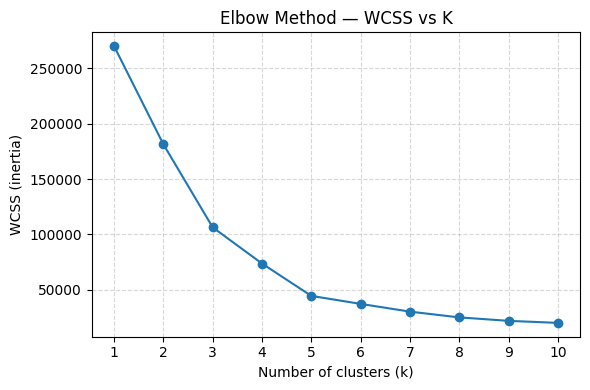

In [23]:
plt.figure(figsize=(6,4))
plt.plot(k_range,wcss,marker='o')
plt.title("Elbow Method — WCSS vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
# From above graph the best k we can see is k=5
k_chosen = 5

# Training K-Means with chosen k

In [28]:
kmeans = KMeans(n_clusters=k_chosen, init='k-means++', random_state=42, n_init=10)
cluster = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_
# adding this in our dataframe
df['Cluster'] = cluster
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Visualizing clusters (Income vs Spending)

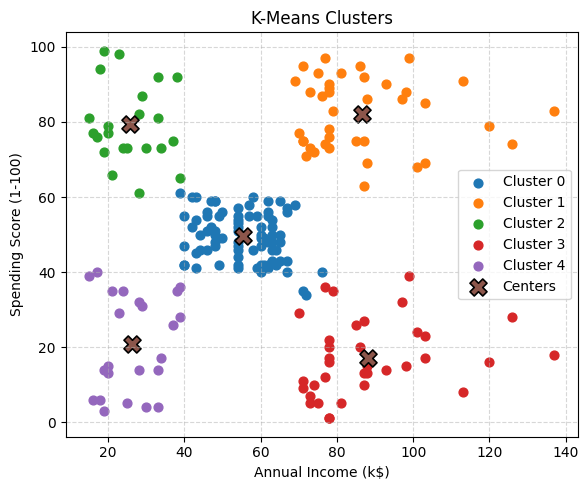

In [31]:
X = x.values
plt.figure(figsize=(6,5))
for c in range(k_chosen):
    mask = (cluster == c)
    plt.scatter(X[mask, 0], X[mask, 1], s=40, label=f"Cluster {c}")
plt.scatter(centers[:, 0], centers[:, 1], s=150, marker='X', edgecolor='k', linewidth=1.2, label='Centers')
plt.title("K-Means Clusters")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
# simple cluster counts
print("\nCluster counts:")
print(df['Cluster'].value_counts().sort_index())


Cluster counts:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
